Проанализируйте клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

- Проведите исследовательский анализ данных,
- Выделите портреты клиентов, которые склонны уходить из банка,
- Сформулируйте и проверьте статистические гипотезы.

*Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*


# Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## Инструкция по выполнению проекта

### Шаг №1. Открыть файл с данными и изучить полученную информацию. 

* [Файл: bank_dataset.csv.](#step1) 

### Шаг №2. Предобработка данных

* [Заменить названия столбцов на удобные](#step3)  
* [Проверить на пропуски и дубликаты. Обработать при необходимости](#step4)
* [Проверить типы данных. Обработать при необходимости](#step2) 

### Шаг №3. Исследовательский анализ данных

* [Разделить датасет отдельно на клиентов кто уже ушел и кто остался.](#step5) 
* [Построить графики по каждому признаку для оставшихся и ушедших клиентов.](#step6) 
* [Описать средний портрет ушедших пользователей на основе выводв из графиков.](#step7) 
* [Сравнить ушедших клиентов.](#step8) 
* [На основе полученных результатов определить сколько мы можем потерять клиентов из тех, кто остался.](#step9) 

### Шаг №4. Формулировка и проверка статистических Гипотез на основе данных
 * [Доход у ушедших и оставшихся клиентов банка одинаков?](#step10) 

### Шаг №5. Итоговый вывод
 * [Вывод и рекомендации](#step11) 

## Шаг №1. Знакомство с данными <a id="step1"></a>  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats as st
import math as mth
from statsmodels.stats.multitest import multipletests


In [2]:
df = pd.read_csv('bank_dataset.csv')

In [3]:
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


### Вывод:

Данные загруженны и теперь можно приступать к предобработке

## Шаг №2. Предобработка данных 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Посмотрим все ли данные в userid - уникальные

In [206]:
df['userid'].nunique()

10000

Приведем все названия к нижнему регистру. <a id="step3"></a>  

In [207]:
df.columns = [x.lower() for x in df.columns]

Как показал анализ всего датасета, пропуски у нас есть только в графе `balance`. Теперь попытаемся определить, есть ли у них какая-то общая закономерность.  <a id="step4"></a>

In [208]:
df[df['balance'].isnull() == True].head(20)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724.03,0


Создадим сводную таблицу чтобы посмотреть как они делятся по городам. 

In [209]:
df[df['balance'].isnull() == True].pivot_table(index = 'city',values = 'estimated_salary', aggfunc = (len, sum))

,len,sum
city,,
Рыбинск,1199.0,1.183516e+08
Ярославль,2418.0,2.396719e+08


Интересная особенность - все пропуски только по городам Рыбинск и Ярославль, по Ростову-Великому их нет. Тут у меня есть два предположения - или данные из Ярославля и Рыбинска не доехали, или там какие-то проблемы с выгрузкой. Необходимо сообщить Дата-Инженеру. 

Поскольку пропусков почти 33 процента, то мы можем пойти двумя путями: 

* Полностью проигнорировать пропуски заменив их какими-либо значениями(например: no-info) и вести анализ на том, что есть. Для формирования выводов данные о балансе нам не особо нужны.
* Придумать логику замены пропущенных значений и продолжить анализ на всех данных.
 
 
***Я считаю, что прописав хорошую логику для замены пропусков, можно этим воспользоваться для дальнейшего анализа. Для этого разделим всех клиентов на три возрастные группы, и после чего, в зависимости от пола и возраста, посчитаем медианное значение. Полученные результаты будем использовать в качестве замены.***

Поделим возраст на три равные части

In [210]:
pd.cut(df['age'],3).value_counts()

(17.926, 42.667]    7106
(42.667, 67.333]    2702
(67.333, 92.0]       192
Name: age, dtype: int64

Как мы видим, в первой страте с 18 до 42 лет слишком много клиентов, поэтому, условно поделим всех так, до 30 лет, c 30 до 60, от 60. Для этого создадим функцию, каторая произведет категоризацию данных.

In [211]:
def age(category):
    if category < 30:
        return 'молодые'
    if category >= 30 and category <= 60:
        return 'взрослые'
    return 'пенсионеры'


Теперь применим функцию и посмотрим что у нас получилось

In [212]:
df['category'] = df['age'].apply(age)

In [213]:
df.head(50)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,category
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,взрослые
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,взрослые
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,взрослые
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,взрослые
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,взрослые
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,взрослые
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,взрослые
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,молодые
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,взрослые
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0,молодые


При помощи сводной таблицы поделим возрастные категории по гендерному признаку и зададим переменные, соответсвующие значениям.

In [214]:
age_gender = df.pivot_table(index = 'category', values = 'balance', columns = ('gender'), aggfunc = 'median')

In [215]:
age_gender

gender,Ж,М
category,,
взрослые,119338.81,120022.92
молодые,115265.14,123374.46
пенсионеры,121211.43,120100.41


In [216]:
adult_man = age_gender['М'][0]
young_man = age_gender['М'][1]
old_man = age_gender['М'][2]

In [217]:
adult_woman = age_gender['Ж'][0]
young_woman = age_gender['Ж'][1]
old_woman = age_gender['Ж'][2]

Теперь создадим функцию, которая будет проверять каждого клиента по заданным условиям и результат сохранять в список.

In [218]:
t = df['gender']
k = df['category']
g = []
for i in range(len(k)):
    if t[i] == 'М'and k[i] == 'взрослые':
        g.append(adult_man)
    if t[i] == 'М'and k[i] == 'молодые':
        g.append(young_man)
    if t[i] == 'М'and k[i] == 'пенсионеры':
        g.append(old_man)
    if t[i] == 'Ж' and k[i] == 'взрослые':
        g.append(adult_woman)
    if t[i] == 'Ж'and k[i] == 'молодые':
        g.append(young_woman)
    if t[i] == 'Ж'and k[i] == 'пенсионеры':
        g.append(old_woman)
    

In [219]:
df['new'] = pd.Series(g)

In [220]:
df.sample(40)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,category,new
1293,15730488,641,Ярославль,М,30,2,87505.47,2,0,1,7278.57,0,взрослые,120022.92
3714,15858164,823,Ярославль,М,34,3,105057.33,1,1,0,9217.92,0,взрослые,120022.92
4854,15616807,706,Ростов Великий,М,23,2,93301.97,2,0,1,127187.04,0,молодые,123374.46
5627,15737910,654,Ярославль,М,29,4,132954.64,1,1,1,146715.07,0,молодые,123374.46
2271,15746324,665,Ростов Великий,М,25,5,153611.83,2,1,0,35321.65,0,молодые,123374.46
3076,15626850,678,Ростов Великий,Ж,43,2,153393.18,2,1,1,193828.27,0,взрослые,119338.81
2870,15693829,707,Ярославль,Ж,55,1,NaN,2,0,1,54409.48,0,взрослые,119338.81
4438,15626586,672,Ростов Великий,М,68,0,126061.51,2,1,1,184936.77,0,пенсионеры,120100.41
428,15619049,486,Ростов Великий,Ж,40,9,71340.09,1,1,0,76192.21,0,взрослые,119338.81
6230,15659690,592,Ярославль,М,71,4,NaN,2,0,1,17013.54,0,пенсионеры,120100.41


In [221]:
df['new'].unique()

array([119338.81, 120022.92, 115265.14, 123374.46, 121211.43, 120100.41])

Теперь заменим все пропуски данными из столбца "new"

In [222]:
df['balance'] = df['balance'].fillna(df['new'])

In [223]:
df.head(10)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,category,new
0,15677338,619,Ярославль,Ж,42,2,119338.81,1,1,1,101348.88,1,взрослые,119338.81
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,взрослые,119338.81
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,взрослые,119338.81
3,15744090,699,Ярославль,Ж,39,1,119338.81,2,0,0,93826.63,0,взрослые,119338.81
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,взрослые,119338.81
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,взрослые,120022.92
6,15635267,822,Ярославль,М,50,7,120022.92,2,1,1,10062.80,0,взрослые,120022.92
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,молодые,115265.14
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,взрослые,120022.92
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0,молодые,123374.46


Лишний столбец теперь можно удалить, так как он нам не пригодится

In [224]:
df.drop('new', axis=1, inplace=True)

In [225]:
df

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,category
0,15677338,619,Ярославль,Ж,42,2,119338.81,1,1,1,101348.88,1,взрослые
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,взрослые
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,взрослые
3,15744090,699,Ярославль,Ж,39,1,119338.81,2,0,0,93826.63,0,взрослые
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,взрослые
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,120022.92,2,1,0,96270.64,0,взрослые
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,взрослые
9997,15627268,709,Ярославль,Ж,36,7,119338.81,1,0,1,42085.58,1,взрослые
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,взрослые


Теперь можем приступить к замене типов данных. <a id="step2"></a>  

In [226]:
df['balance'] = round(df['balance'], 0)
df['estimated_salary'] = round(df['estimated_salary'], 0)

In [227]:
df['balance'] = df['balance'].astype(int)
df['estimated_salary'] = df['estimated_salary'].astype(int)

In [228]:
df.dtypes

userid               int64
score                int64
city                object
gender              object
age                  int64
objects              int64
balance              int32
products             int64
creditcard           int64
loyalty              int64
estimated_salary     int32
churn                int64
category            object
dtype: object

## Вывод: 

Мы ознакомились с данными, которые для анализа предоставил банк. В целом, данные предоставленны качественные, однако можно передать информацию Дата-инженерам о наличии такого количества пропусков в столбце Баланс по Сантк-Петербургу и Рыбинску.

## Шаг №3. Исследовательский анализ данных

Чтобы определить портрет клиентов которые склонны уходить из банка, нам необходимо поделить датасет на две части и проанализировать тех, кто уже ушел и сравнить с теми, кто еще пользуется услугами банка.<a id="step5"></a>  

Для дальнейшего удобства разделим исходный датасет на два по оставшимся и ушедшим клиентам

In [229]:
stayed = df.query('churn == 0')
lost = df.query('churn == 1')

Посмотрим сколько их количественно

In [230]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Создадим функцию которая будет строить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). <a id="step6"></a> 

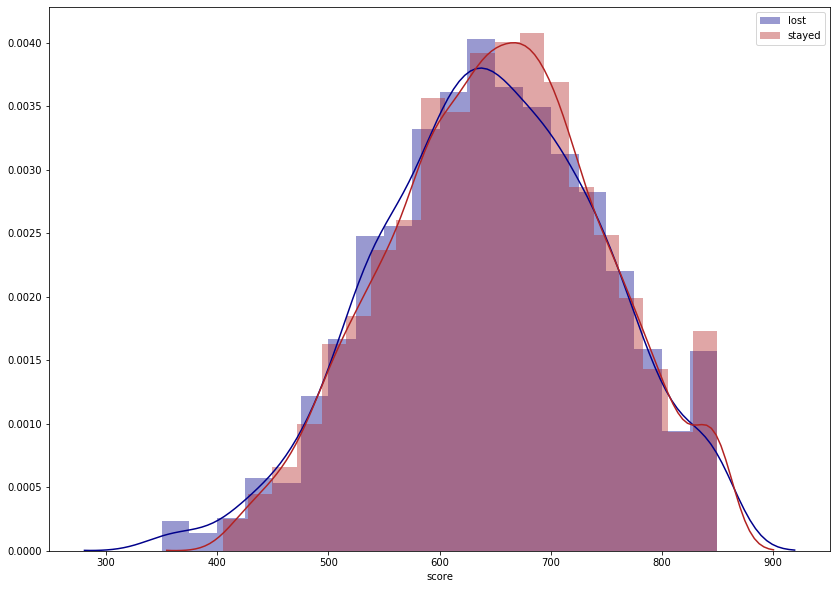

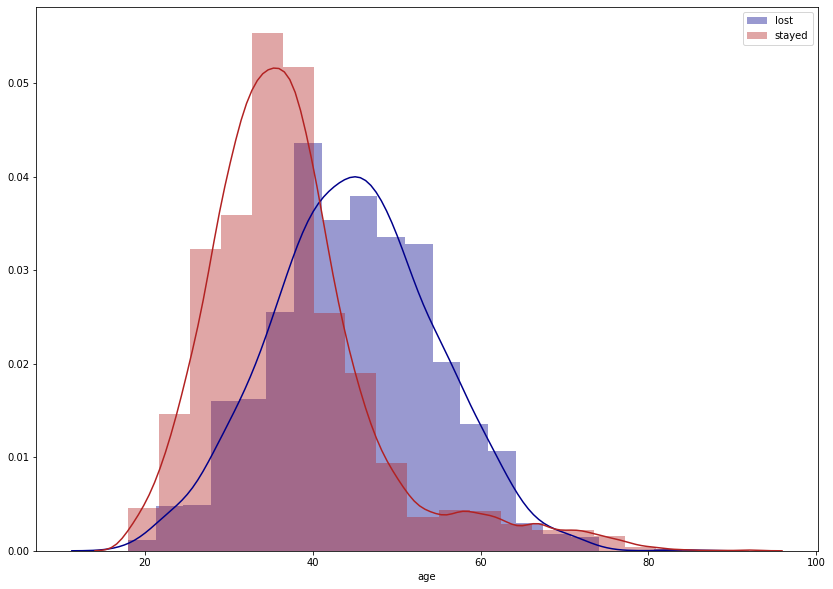

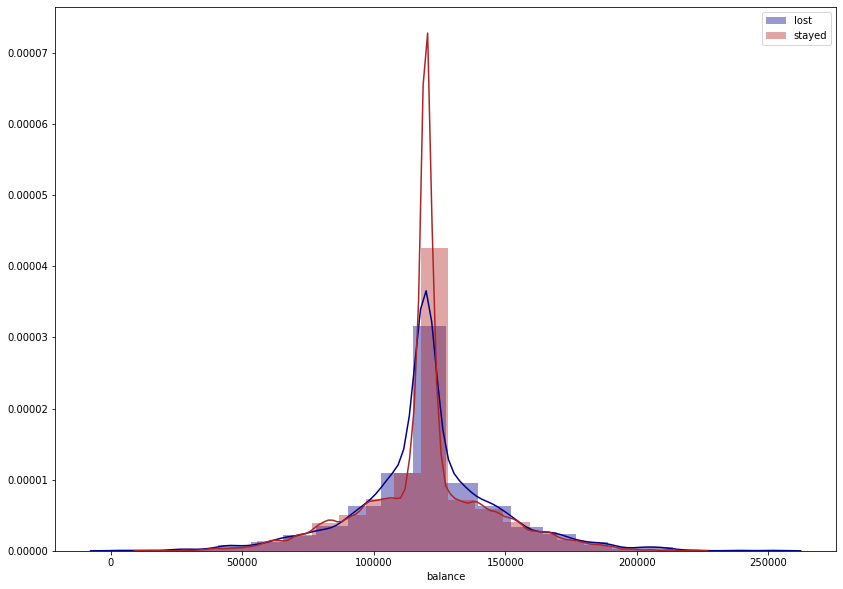

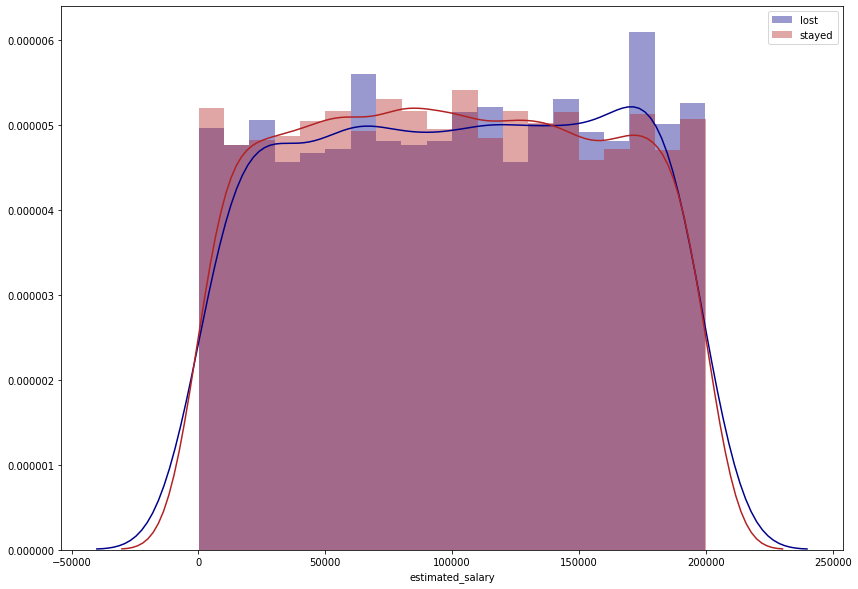

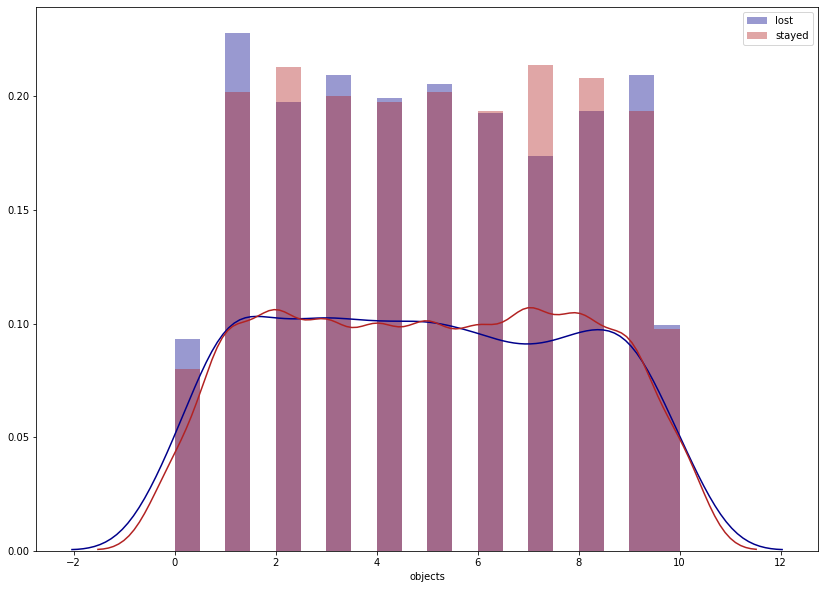

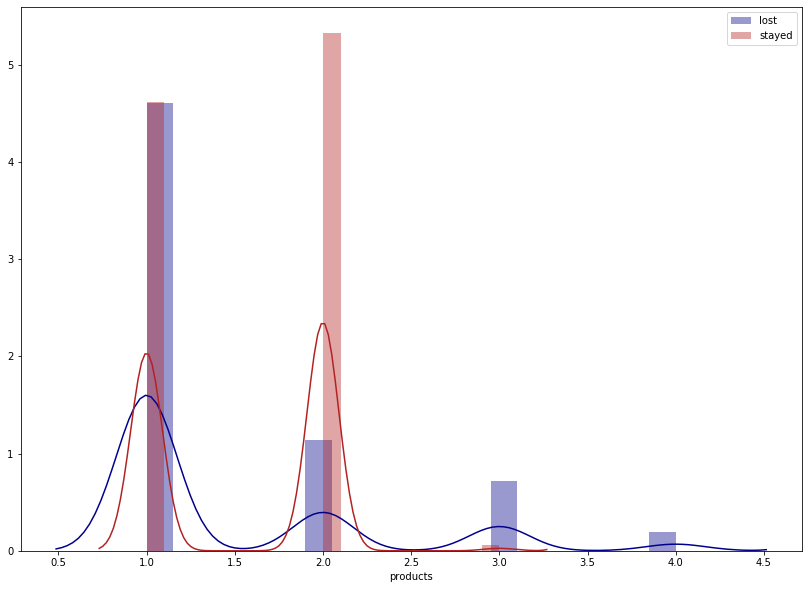

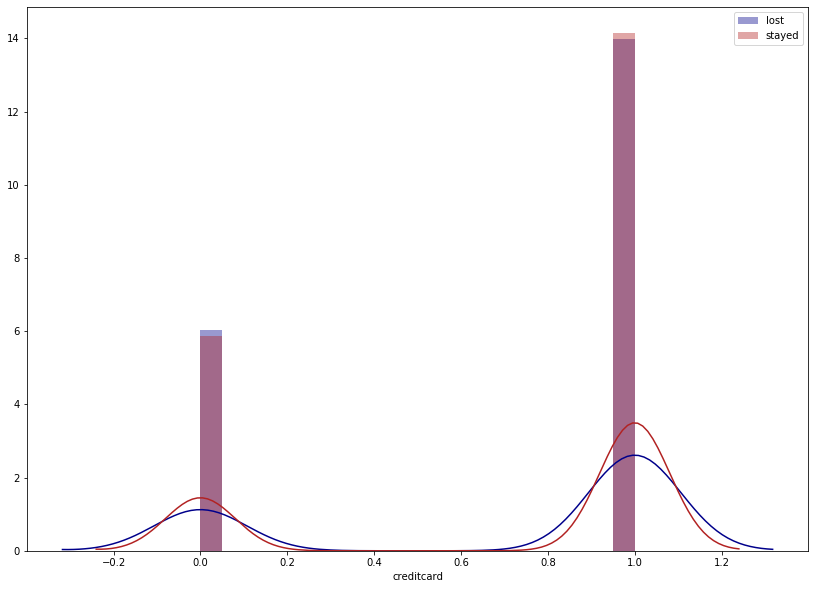

In [231]:
for column in ['score', 'age', 'balance', 'estimated_salary', 'objects', 'products', 'creditcard']:
    plt.figure(figsize=(14, 10))
    sns.distplot(lost[column], label ='lost', bins = 20, color= 'darkblue')
    sns.distplot(stayed[column], label ='stayed', bins = 20, color= 'firebrick')
    plt.legend()
    plt.show()

Теперь для наглядности построим графики распределения этих же параметров, чтобы мы смогли сделать выводы.

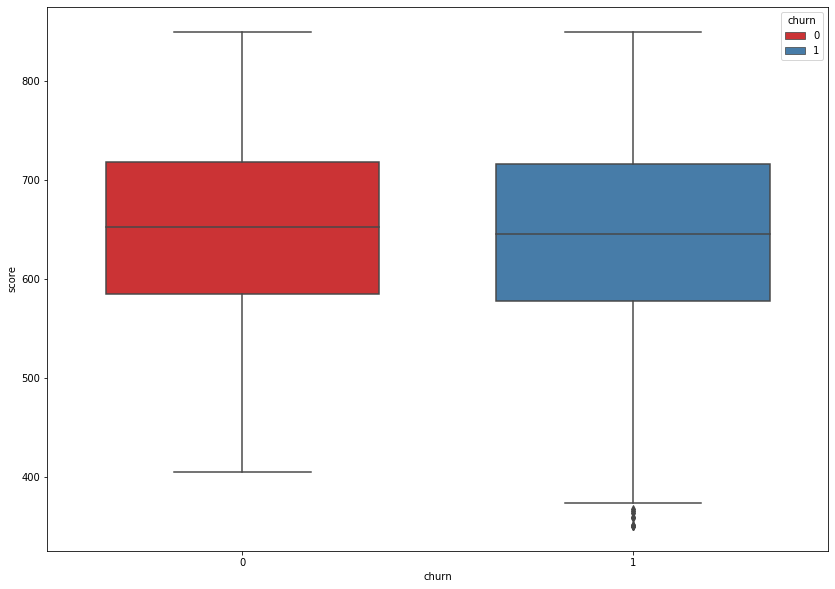

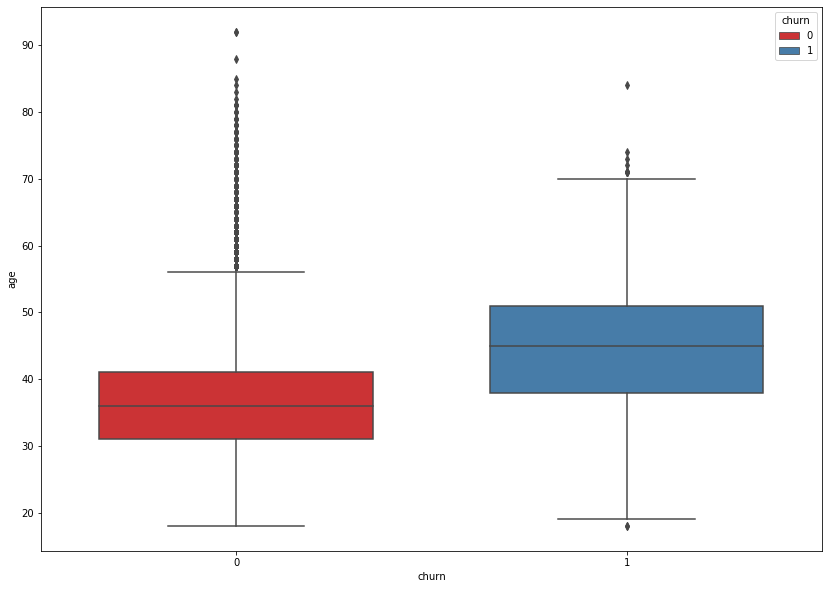

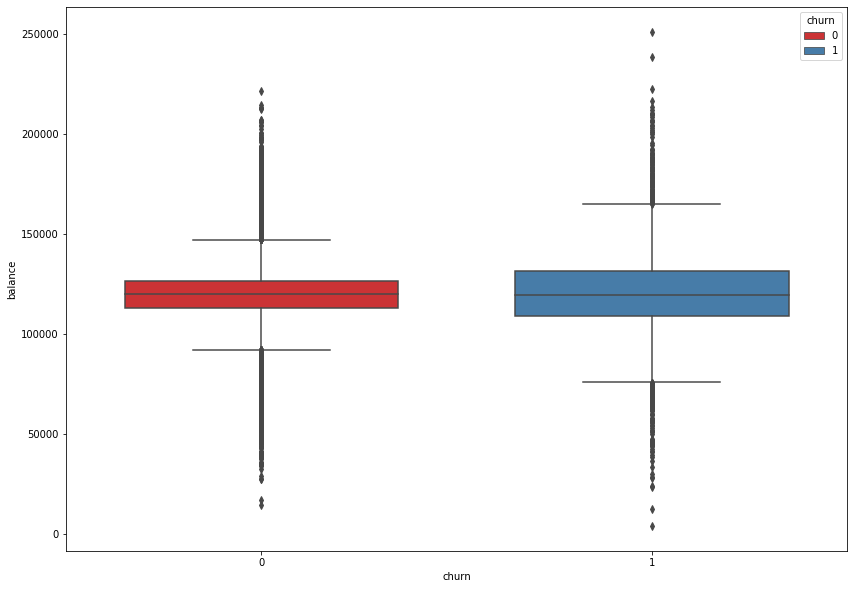

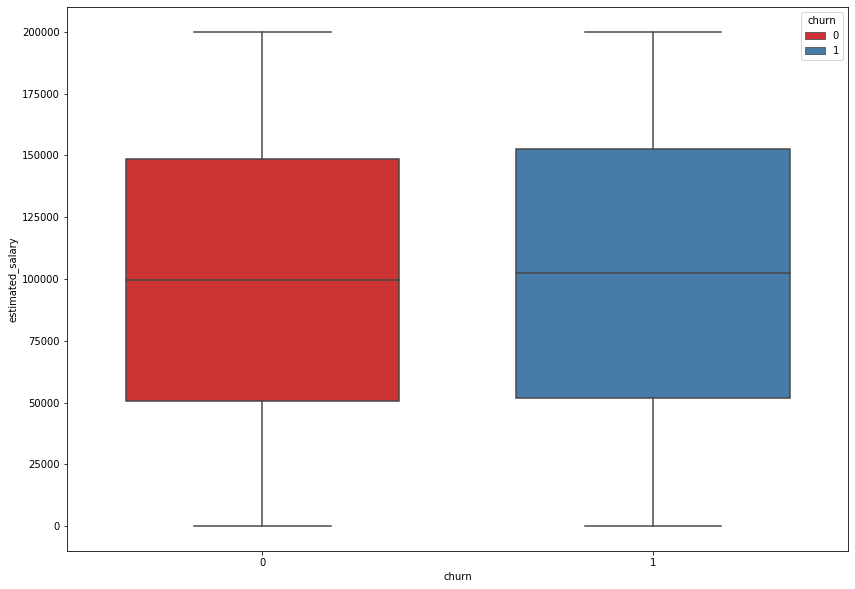

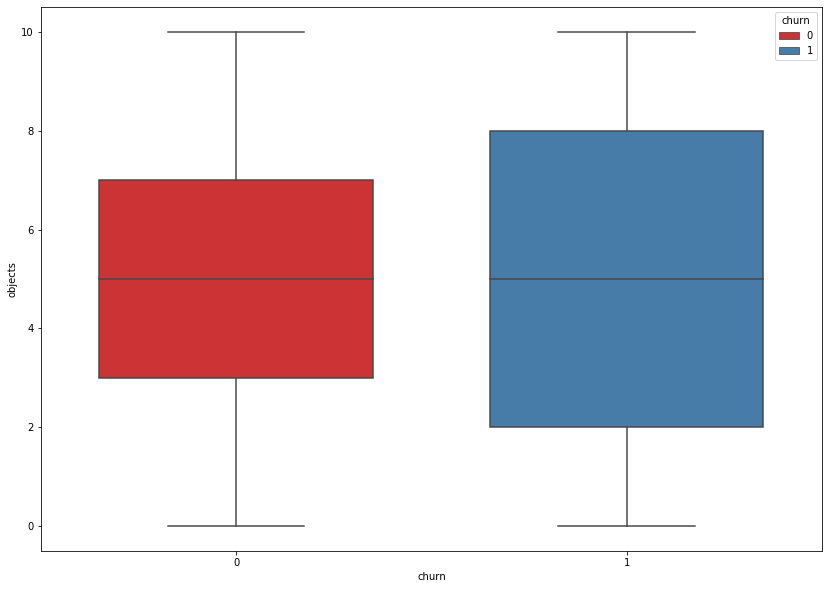

In [232]:
for column in ['score', 'age', 'balance', 'estimated_salary', 'objects']:
    plt.figure(figsize=(14, 10))
    ax = sns.boxplot(x = 'churn', y = column, data = df, hue="churn", palette="Set1", width= 0.7, dodge=False)
    plt.show()

## Вывод: 

<a id="step7"></a> Сейчас смело можно сказать, что рассмотренные числовые параметры ушедших и оставшихся клиентов во многом идентичны. Единственный момент, который сразу бросается в глаза - это возраст. Клиенты покинувшие наш банк - почти на 10 лет старше. Среди ушедших, в основном люди от 40 до 50 лет. Это говорит о том, что в банке, скорее всего, хорошие условия для лиц молодежи. Как мне кажется, стоит на это обратить внимание людям, которые занимаются продуктом. 

Еще одну интересную особенность мы заметили при проверке количества продуктов на столбчатой диаграмме. Оставшиеся клиенты чаще всего пользовались двумя продуктами в банке, в отличии от ушедших клиентов.


<a id="step8"></a>Посмотрим на сводную таблицу оставшихся и ушедших клиентов по городам, при помощи которой посчитаем долю ушедших клиентов. 

In [233]:
share = df.pivot_table(index = 'city', columns = 'churn', values = 'gender', aggfunc = len)

In [234]:
share['total'] = share[0] + share[1]
share['percent'] = round(share[1] / (share['total']), 2)

In [235]:
share

churn,0,1,total,percent
city,,,,
Ростов Великий,1695,814,2509,0.32
Рыбинск,2064,413,2477,0.17
Ярославль,4204,810,5014,0.16


Теперь построим круговую диаграмму 

In [236]:
colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)']
column1 = [1695, 814]
column2 = [2064, 413]
column3 = [4204, 810]

data = ['stayed', 'lost']


fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Ростов Великий', 'Рыбинск', 'Ярославль'])
fig.add_trace(go.Pie(labels= data, values=column1,
                     name="Ростов Великий", marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels= data, values= column2,
                     name="Рыбинск", marker_colors=colors), 1, 2)
fig.add_trace(go.Pie(labels= data, values= column3,
                     name="Ярославль", marker_colors=colors), 1, 3)


fig.update_layout(title_text='Распределение по городам ушедших и оставшихся пользователей')
fig.show()

## Вывод: 

Здесь мы видим, что чаще всего покидают банк клиенты из Ростова Великого. В свою очередь, это нам может говорить о том, в городе могут быть невыгодные условия для клиентов, из-за чего они уходят. Возможно, сотрудники самого банка не дорабатывают.

Теперь проделаем тоже самое, только для гендерных признаков

In [237]:
man_woman = df.pivot_table(index = 'gender', columns = 'churn',values = 'age', aggfunc = len)

In [238]:
man_woman['total'] = man_woman[0] + man_woman[1]
man_woman['percent'] = round(man_woman[1] / (man_woman['total']), 2)

In [239]:
man_woman

churn,0,1,total,percent
gender,,,,
Ж,3404,1139,4543,0.25
М,4559,898,5457,0.16


In [240]:
colors = ['rgb(33, 75, 99)', 'rgb(151, 179, 100)']
column1 = [3404, 1139]
column2 = [4559, 898]

data = ['stayed', 'lost']


fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Женщины', 'Мужчины'])
fig.add_trace(go.Pie(labels= data, values=column1,
                     name="Ж", marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels= data, values= column2,
                     name="М", marker_colors=colors), 1, 2)


fig.update_layout(title_text='Распределение по гендерным признакам ушедших и оставшихся пользователей')
fig.show()

## Вывод: 

Анализ показывает, что женщины уходят из банка чаще. Конечно, это может быть связано с уровнем дохода, попытаемся это проверить.

In [241]:
man = df.query('gender == "М"')
woman = df.query('gender == "Ж"')

Посмотрим на сводные таблицы отдельно по каждому полу. Попытаемся найти какие-то признаки, которые нам дадут понять, почему именно женщины уходят из банка чаще. Сравним по показателям дохода, наличию кредитных карты, объектов недвижимости и кредитного рейтинга.

In [242]:
round(man.pivot_table(index = 'churn', values = ('estimated_salary', 'age', 'score', 'creditcard', 'objects'), aggfunc = 'mean'), 2)

,age,creditcard,estimated_salary,objects,score
churn,,,,,
0,37.43,0.71,99680.38,5.08,651.63
1,44.91,0.70,99584.29,4.93,643.41


In [243]:
round(woman.pivot_table(index = 'churn', values = ('estimated_salary', 'age', 'score', 'creditcard', 'objects'), aggfunc = 'mean'), 2)

,age,creditcard,estimated_salary,objects,score
churn,,,,,
0,37.38,0.7,99816.07,4.98,652.15
1,44.78,0.7,102949.00,4.93,646.88


Как мы видими, средние показатели что у мужчин, что у женщин примерно одинаковые и нет каких-либо серьезных отличий. В связи с этим, можно сделать вывод, что надо искать причину вне предоставленых данных.

## Вывод: 

На основе полученных графиков мы можем сформировать приблизительный портрет клиентов, которые склонны уходить из банка:

    1) Возраст от 40-50
    2) Чаще всего не пользуются 2 продуктами
    3) В основном из Ростова Великого
    4) Преимущественно женщины.

<a id="step9"></a> По имеющимся критериям сделаем срез из действующих клиентов найдем тех, кто может совсем скоро уйти. Обязательно будем учитывать параметр Loyality. 

In [244]:
print("Количество оставшихся клиентов всего :", len(stayed))

Количество оставшихся клиентов всего : 7963


In [245]:
attention = stayed.query('age > 40 & products != 2 & city == "Ростов Великий" & loyalty == 0 & gender == "Ж"')

In [246]:
attention.head(10)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,category
313,15840696,806,Ростов Великий,Ж,59,0,135296,1,1,0,182822,0,взрослые
409,15734361,537,Ростов Великий,Ж,41,3,138306,1,1,0,106761,0,взрослые
595,15723706,611,Ростов Великий,Ж,41,2,114207,1,1,0,164062,0,взрослые
609,15629321,698,Ростов Великий,Ж,51,2,111019,1,1,0,86410,0,взрослые
751,15676981,758,Ростов Великий,Ж,47,9,95523,1,1,0,73294,0,взрослые
792,15750209,850,Ростов Великий,Ж,48,6,111963,1,1,0,111756,0,взрослые
1507,15620010,549,Ростов Великий,Ж,43,3,134986,1,1,0,6101,0,взрослые
1560,15677017,720,Ростов Великий,Ж,43,10,110823,1,0,0,72862,0,взрослые
1645,15642846,506,Ростов Великий,Ж,41,3,57746,1,1,0,4035,0,взрослые
1752,15767202,744,Ростов Великий,Ж,41,2,84113,1,1,0,197549,0,взрослые


In [247]:
print("Количество оставшихся клиентов в зоне риска :", len(attention))

Количество оставшихся клиентов в зоне риска : 44


In [248]:
print("Процент возможных отпадов :", round(len(attention)/len(stayed), 2))

Процент возможных отпадов : 0.01


## Вывод: 

По самым грубым подсчетам мы пришли к выводу, что у нас 1% клиентов находятся в красной зоне риска и могут совсем скоро уйти.


## Шаг №4. Формулировка и проверка статистических Гипотез на основе данных <a id="step10"></a> 
 * Доход у ушедших и оставшихся клиентов банка одинаков?

Сформируем гипотезы для проверки равенства доходов оставшихся и ушедших клиентов при помощи метода st.ttest_ind(): - поскольку выборки у нас будут приниматься разные. 

* Нулевая гипотеза - Доходы равны. 
* Альтернативная гипотеза - Доходы различаются.

In [249]:
ushli = lost['estimated_salary']
ostalis = stayed['estimated_salary']

In [250]:
alpha = .05

results = st.ttest_ind(
    ushli , 
    ostalis, equal_var = False)

print('p-значение по балансу: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу о равенстве")
else:
    print("Не получилось отвергнуть нулевую гипотезу о равенстве")

p-значение по балансу:  0.22892180164065798
Не получилось отвергнуть нулевую гипотезу о равенстве


## Вывод: 

Итоговое значение p-value говорит о том, что доходы рейтинги у оставшихся и ушедших пользователей примерно одинаковы. Можем сделать вывод, что нулевую гипотезу не получилось отвергнуть.

# Итоговый Вывод:  <a id="step11"></a>

Мы проанализировали даннные и пришли к следующим заметкам потрета людей, которые склонны уходить из банка. : 

* Взрослая аудитория в возрасте 40-50 лет чаще других перестает пользоваться услугами банка. 
* Пользователи, которые еще работают с банком предпочитают пользоваться двумя продуктами банка.
* В области, а в частности Ростове, необходимо проводить рекламную компанию и придумывать как поднять имидж и превлакательность банка. Больше всего пользователей отказываются от банка именно в Ростове. Может быть персонал отделений их не устраивает. Стоит на это тоже обратить внимание.
* Есть странная особенность, что при равных условиях женщины покидают банк чаще мужчин.


Среди оставшихся клиентов по грубых подсчетам можем скоро потерять минимум 1% базы.

<a id="step13"></a>В связи с этим есть небольшие рекомендации по проведенному анализу:

Что касается качества данных, необходимо сообщить, что имеется порядка 30 % пропусков в колонке `balance` по городам Рыбинск и Ярославль.
Маркетологам больше обращать внимание аудиторию за 40 и стараться удерживать их заманчивыми предложениями. Необходимо собрать больше данных чтобы понять, почему среди ушедших больше женщин. 